# **PDE Simulation - Poisson's Problem (2nd Method)**

## **Given Poisson's equation** 

Poisson's equation is given by:
$$\phi_{xx} + \phi_{yy} = \rho(x,y)$$

We us finite difference method which approximates Poisson's equation:

$$\frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}+\frac{\phi_{i,j+1}-2 \phi_{i,j}+\phi_{i,j-1}}{k^2}=\rho_{i,j} \quad (1)$$

Where $$\dfrac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}$$ and $$\dfrac{\phi_{i,j+1}-2 \phi_{i,j}+\phi_{i,j-1}}{k^2}$$ are the numerical approximations for $\phi_{xx}$ and $\phi_{yy}$ respectively.

We rearrange the equation $(1)$ and we get the value of $\phi$ at node $(i,j)$ as follows:

$$\phi_{i,j}=\frac{(\phi_{i+1,j}+\phi_{i-1,j})k^2+(\phi_{i,j+1}+\phi_{i,j-1})h^2-\rho_{i,j}h^2k^2}{2(h^2+k^2)}$$

For Poisson's problem, we will be working with the following value intervals and boundary conditions:

For the **space of study**, we have:

-   $x_{\rm min} = 0.0$

-   $x_{\rm max} = 1.0$

-   $y_{\rm min} = 0.0$

-   $y_{\rm max} = 1.5$

For **the boundary conditions**, we have:

-   The boundary conditions for $\phi$ at the $x_{\rm min}$ boundary are
    **Dirchlet**. Specifically, $\phi(0, y)= -0.1$, for all $y$ values.

    Numericaly speaking: $\phi_{0,j} = -0.1$

-   The boundary conditions for $\phi$ at the $x_{\rm max}$ boundary are
    **Neumann**. Specifically, $\dfrac{d\phi(1.0, y)}{dx} = 0.1$.

Following the numerical approximation, we have: 
$$\dfrac{d\phi(1.0, y)}{dx} = 0.1 \approx	\dfrac{\phi_{n-1, j} - \phi_{n-2, j}}{h} $$
Which leaves us with:
$$\phi_{n-1, j} = \phi_{n-2, j} +0.1h $$

-   The boundary conditions for $\phi$ on the $y_{\rm max}$ and
    $y_{\rm min}$ boundaries are periodic. Specifically,
    $\phi(x,0) = \phi(x,1.5)$, we give it equals to 0.

    Numericaly speaking: $\phi_{i,0} = \phi_{i,m-1} = 0$

**Charge Distribution**

For this problem, we will assume that the charge for each is at exactly
one location. If it is exactly in between location, round UP to the nearest cell. 
The particular cell it lies in will depend on the grid's resolution.

Since the CHARGE DENSITY is needed for the density vector, we need to
divide the actual charge by the area of the node.

$$\rho = \frac{Q}{hk}$$

where $h$ and $k$ are the dimensions of the cells.

The initial charge distribution is:

-   There is a charge of $1.0$ at $(0.3,0.4)$. Which means: $$\rho(0.3,0.4) = \dfrac{1}{hk}$$

-   There is a charge of $-0.5$ at $(0.7,1.2)$. Which means: $$\rho(0.7,1.2) = \dfrac{-0.5}{hk}$$

And **it's zero elsewhere**.


## **Grid Geometry**


The system solution should be made using a center difference finite
difference Poisson solver with a resolution of $n \times m$ elements
corresponding to a physical size of $h \times k$.

With this resolution, the cell sizes will be $$\begin{aligned}
h = \frac{x_{max} - x_{min}}{n} = 1.0 / n \\
k = \frac{y_{max} - y_{min}}{m} = 1.5 / m\end{aligned}$$

The grid has a regular shape, but $h$ and $k$ are not necessarily equal.


At this point, its important to decide what nodes actually have unknown
values.

-   Clearly the left boundary is know because of the initial conditions.

-   The top and bottom boundaries are identical, so only one needs to be
    calculated.

-   The normal derivative at the right boundary is specified, but the
    value is not - thus the value along the right boundary must be
    calculated as well.

## **A Critical Hint**

There are two grids

-   a physical grid with cells that mimics the geometry and

-   a computational matrix that is used for the linear solve $$Ax = b$$

***Note:*** A is NOT a symmetric matrix. Most of the elements of A are zero.

*EVERY NODE IN THE PHYSICAL GRID IS DIRECTLY MAPPED TO ONE LINE IN THE
COMPUTATONAL MATRIX.*

## **Numbering the Nodes**

We will number the nodes with values of $i$ and $j$. The lower left
corner will have $i=0$ and $j=0$.  The top right corner will have $i= n-1$, $j = m-1$.  We will be using zero indexed array notations for consistency.

To make the notation easier, consider $u_{\lambda} = 
\phi_{i,j}$ where $\lambda = i + j \times n$. There are $n$
different columns and $m$ different rows, so there are $n \times m$
different coupled equations.

Using this notation, it is clear that:

- $\lambda = 0$  when i =0, j = 0. (the bottom left corner)
- $\lambda = n-1$  when i = n-1, j = 0 (the bottom right corner)
- $\lambda = (m-1) \times n$ when i = 0, j = m-1 (the top left corner)
- $\lambda = (m-1) \times n + n-1$ when i = n-1, j=m-1 (the top right corner)


## **Creating the Matrix**

- **Interior points:**
  
  - there will be 5 non-zero entries in each row that corresponds to an interior point.

  - the $\rho$ vector will correspond to the local density in the target cell.

- **Edge points:**
  
  - there will be 4 non-zero entries in each row that corresponds to an interior point.

  - with reflective BC, there will be 5 non-zero entries as in interior points.
  
  - the $\rho$ vector will correspond to the local density in the target cell as modified by corner points.

- **Corner points:**

  - corners must be considered as special cases.

  - there will be 3 non-zero entries in each row that corresponds to an interior point.

  - the $\rho$ vector will correspond to the local density in the target cell as modified by the two boundary points.

## **Interior Regions of the Solution**

The interior points are those bounded by $i = [1, n-2]$ and $j = [1, m-2]$

Away from the boundary conditions, the equations are straight-forward.
We simply write the equations in terms of the surrounding points.

This general form
$$\frac{\phi_{i+1,j} - 2 \phi_{i,j} + \phi_{i-1,j}}{h^2} + 
\frac{\phi_{i,j+1} - 2 \phi_{i,j} + \phi_{i,j-1}}{k^2} =
\rho_{i,j}$$

becomes $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$



## **Assigning Elements to the Matrix**


This equation: $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$

Tells you the values and the locations for the non-zero elements. For
row $\lambda$, there are 5 non-zero elements

-   $A_{\lambda, \lambda - n} = 1/k^2$

-   $A_{\lambda, \lambda - 1} = 1/h^2$

-   $A_{\lambda, \lambda} = -2 ( 1/h^2 + 1/k^2$)

-   $A_{\lambda, \lambda + 1} = 1/h^2$

-   $A_{\lambda, \lambda + n} = 1/k^2$

**Similar assignments are done for the edges and for the corners.**




## **The Left Edge - Dirchlet BC**

The left edge is all defined by all the values of $i=0$ with $j= [0, m-1]$.  
For the left edge, we have to implement Dirchlet BC. Since
$\phi(x_{\rm min},y) = -0.1$, we need to modify the general form of our
equation to accommodate this condition for the column on the left side
of the domain.



We have to change the general form
$$\frac{\phi_{i+1,j} - 2 \phi_{i,j} + \phi_{i-1,j}}{h^2} + 
\frac{\phi_{i,j+1} - 2 \phi_{i,j} + \phi_{i,j-1}}{k^2} =
\rho_{i,j}$$

to something which fits the specific BC for this problem.


This general form
$$\frac{\phi_{i+1,j} - 2 \phi_{i,j} + \phi_{i-1,j}}{h^2} + 
\frac{\phi_{i,j+1} - 2 \phi_{i,j} + \phi_{i,j-1}}{k^2} =
\rho_{i,j}$$

becomes $$\begin{aligned}
\phi_{\rm left} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$

where $\phi_{\rm left}$ is the Dirchlet condition. We can rearranging
into $$\begin{aligned}
 - [2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} - [\frac{1}{h^2}] \phi_{\rm left}\end{aligned}$$

We have changed the $\rho$ vector to adapt to the BC. There will be four
entries for this row of the $A$ matrix instead of five for the central
regions.


## **The Neumann BC - the right side**

The right edge is all defined by all the values of $i=n-1$ with $j= [0, m-1]$.

For the right edge, we have to implement Neumann BC. Since
$d\phi(x_{\rm max},y)/dx = 0.1$, we need to modify the general form of
our equation to accommodate this condition for the column on the right
side of the domain.

Again, we have to change the general form
$$\frac{\phi_{i+1,j} - 2 \phi_{i,j} + \phi_{i-1,j}}{h^2} + 
\frac{\phi_{i,j+1} - 2 \phi_{i,j} + \phi_{i,j-1}}{k^2} =
\rho_{i,j}$$

to something which fits the specific BC for this problem.

## **Neumann BC**


To understand this problem, consider the one-dimensional finite
difference problem- $$\frac{\phi_{i+1} - 2 \phi_{i} + \phi_{i-1}}{h^2} =
\rho_{i}$$

We have represented the second derivative as a central difference of two
first order directives. In other words,
$$\frac{d^2 \phi}{dx^2} \approx \frac{
(d\phi / dx)_{i+1} - (d\phi / dx)_{i-1}}{h}$$

where we have represented $$\begin{aligned}
(\frac{d \phi}{dx})_{i+1} = \frac{\phi_{i+1} - \phi_{i}}{h} \\ \nonumber
(\frac{d \phi}{dx})_{i-1} = \frac{\phi_{i} - \phi_{i-1}}{h} \nonumber\end{aligned}$$








Using our one-dimensional case:

$$\frac{\phi_{i+1} - 2 \phi_{i} + \phi_{i-1}}{h^2} = 
\rho_{i} $$ 
Since we already know the value of the normal
derivative on the boundary, we can approximate this with a center
difference formula:
$$\left( \frac{d \phi}{dx} \right)_{\rm right} \approx \frac{ \phi_{i+1} - \phi_{i-1}}{2h}$$

by rearranging this, we obtain
$$\phi_{i+1} = + 2 h \left( \frac{d\phi}{dx} \right)_{\rm right} + \phi_{i-1}$$

substituting this into the equation above, we obtain $$\frac{
 2 h \left( \frac{d\phi}{dx} \right)_{\rm right} + \phi_{i-1}
 - 2 \phi_{i} + \phi_{i-1}}{h^2} = 
\rho_{i}$$

$$2 \left( \frac{
\phi_{i-1}
 -  \phi_{i}}{h^2} \right) =
\rho_{i} -  \frac{2}{h} \left( \frac{d\phi}{dx} \right)_{\rm right}$$


##**Neumann BC for our Problem**


Applying these ideas to our problem, we start with $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$

we use the result
$$u_{\lambda+1} = + 2 h \left( \frac{du}{dx} \right)_{\rm right} + u_{\lambda-1}$$

$$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} \\ \nonumber
+ [\frac{1}{h^2}] 
\left( 2 h \left( \frac{du}{dx} \right)_{\rm right} + u_{\lambda-1} \right)
\\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] 
u_{\lambda-n} 
= \rho_{\lambda} \end{aligned}$$

with the final result of $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
\\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] 
u_{\lambda-n} 
= \rho_{\lambda} 
-\left( \frac{2}{h} \left( \frac{du}{dx} \right)_{\rm right} \right)\end{aligned}$$



## **Periodic BC's**


At the bottom boundary, the value must be equal to the top boundary.
This "wrap around" is known as a periodic boundary condition.

We implement a period boundary condition by using the finite different
between the top and bottom boundaries as though they were connected. If
you were to cut this grid out and paste it together so the top and
bottom boundaries joined, the finite difference scheme would be correct.


For the bottom and top rows of our solution, we must implement periodic
boundary conditions. This means that
$u(x,y_{\rm min}) = u(x,y_{\rm max})$.

We will consider the top boundary first.


Notice that the top boundary we need to consider is actually just below
the boundary upper line of the grid.


## **The Top Boundary**

Starting with the general form- $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$

we obtain $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda-n \times (m-1)} + 
[\frac{1}{k^2}] u_{\lambda-n}
 = \rho_{\lambda} \end{aligned}$$

where $m$ is the maximum row number.



## **The bottom boundary**

At the bottom boundary, we again start with the general form-
$$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] u_{\lambda-n} = \rho_{\lambda} \end{aligned}$$

we obtain $$\begin{aligned}
u_{\lambda -1} - 
[2(\frac{1}{h^2} + \frac{1}{k^2})] u_{\lambda} 
+ [\frac{1}{h^2}] u_{\lambda+1} \\ \nonumber
+ [\frac{1}{k^2}] u_{\lambda+n} + [\frac{1}{k^2}] 
u_{\lambda+ n \times (m-1)}
 = \rho_{\lambda} \end{aligned}$$

where $m$ is the maximum row number.



## **Corners**

The four corners of the computational domain are special cases. They are
combinations of the different boundary conditions already solved for.

## **Putting All This Together**

The basic steps for solving this problem are:

-   calculate the coefficients for the $A$ matrix for the interior
    points

-   calculate the coefficients for the $A$ matrix at the boundary points
    and corners - be sure to add the corrections to the density matrix
    from the BC's

-   map the charges to the density matrix

-   solve the problem using a sparse linear solver, keeping track of the
    locations of the coefficients

-   plot the solution on a grid

# **Let's Run Some Code !**

## **Sparse Matrix Representations**

To fit this all into memory, we need to use a Sparse matrix representation.

### For more info, read this:
[https://docs.scipy.org/doc/scipy/reference/sparse.html](https://docs.scipy.org/doc/scipy/reference/sparse.html)

The idea of a sparse matrix is to store only the non-zero elements.

In [ ]:
import numpy as np
import scipy as sci
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from pylab import *
import matplotlib.pyplot as plt
from math import ceil

In [ ]:
xmax = 1.0
xmin = 0.0
n = 150
h = (xmax - xmin) / float(n)

ymax = 1.5
ymin = 0.0
m = 150
k  = (ymax - ymin) / float(m)

lmax = n*m

def calcLambda(i, j, n, m):
  return i + j * n

uleft = -0.1
dudx = 0.1

# Define the sparse matrix and the second member
AA = lil_matrix((lmax, lmax))
rho = np.zeros((lmax, 1))

In [ ]:
#### ---- Interior values ---- ####

# Loop through the rows and columns of the physical grid
for i in range(1,n-1):
  for j in range(1, m-1):  
    ll = calcLambda(i, j, n, m)

    AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
    AA[ll, ll - 1] = 1/h**2
    AA[ll, ll + 1] = 1/h**2

    AA[ll, ll + n] = 1/k**2
    AA[ll, ll - n] = 1/k**2

In [ ]:
#### ---- Bottom edge ---- ####
j = 0
for i in range( 1, n-1):
  ll = calcLambda(i, j, n, m)
  AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
  AA[ll, ll-1] = 1/h**2
  AA[ll, ll+1] = 1/h**2

  AA[ll, ll+n] = 1/k**2
  AA[ll, ll+n*(m - 1)] = 1/k**2

In [ ]:
#### ---- Top edge ---- ####
j = m - 1
for i in range( 1, n-1):
  ll = calcLambda(i, j, n, m)
  AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
  AA[ll, ll-1] = 1/h**2
  AA[ll, ll+1] = 1/h**2

  AA[ll, ll-n] = 1/k**2
  AA[ll, ll-n*(m - 1)] = 1/k**2

In [ ]:
#### ---- Left edge ---- ####
i = 0 
for j in range(1, m-1):
  ll = calcLambda(i, j, n, m)

  AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
  AA[ll, ll + 1] = 1/h**2

  AA[ll, ll + n] = 1/k**2
  AA[ll, ll - n] = 1/k**2

  rho[ll][0] = -1/h**2*uleft

In [ ]:
#### ---- Right edge ---- ####
i = n - 1
for j in range(1, m-1):
  ll = calcLambda(i, j, n, m)

  AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
  AA[ll, ll - 1] = 1/h**2

  AA[ll, ll + n] = 1/k**2
  AA[ll, ll - n] = 1/k**2

  rho[ll][0] = -2*h*dudx

In [ ]:
#### ---- Corners ---- ####
## --- Low-Left Corner --- ##
i = 0
j = 0
ll = calcLambda(i, j, n, m)

AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
AA[ll, ll + 1] = 1/h**2
AA[ll, ll + n] = 1/k**2
AA[ll, ll+n*(m - 1)] = 1/k**2
rho[ll][0] = -1/h**2*uleft

In [ ]:
## --- Low-Right Corner --- ##
i = n - 1
j = 0
ll = calcLambda(i, j, n, m)

AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
AA[ll, ll - 1] = 1/h**2
AA[ll, ll + n] = 1/k**2
AA[ll, ll+n*(m - 1)] = 1/k**2
rho[ll][0] += -2*h*dudx

In [ ]:
## --- Up-Left Corner --- ##
i = 0
j = m - 1
ll = calcLambda(i, j, n, m)

AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
AA[ll, ll - n] = 1/k**2
AA[ll, ll + 1] = 1/h**2
AA[ll, ll-n*(m - 1)] = 1/k**2
rho[ll][0] = -1/h**2*uleft

In [ ]:
## --- Up-Right Corner --- ##
i = n - 1
j = m - 1
ll = calcLambda(i, j, n, m)

AA[ll,ll] = -2 * (1/h**2 + 1/k**2)
AA[ll, ll - 1] = 1/h**2
AA[ll, ll - n] = 1/k**2
AA[ll, ll-n*(m - 1)] = 1/k**2
rho[ll][0] += -2*h*dudx

AAcopy = AA.copy()
AAcopy = AAcopy.tocsc()
B = np.array(AAcopy.toarray())

In [ ]:
#### --- Rho vector --- ####
# Area 1: There is a charge (NOT CHARGE DENSITY) of 1.0 at (0.3,0.4)
i_index1 = int(0.3/h)
j_index1 = int(0.4/k)

mat_index1 = calcLambda(i_index1, j_index1, n, m)
rho[mat_index1][0] += 1.0/(h*k)

# Area 2: There is a charge (NOT CHARGE DENSITY) of −0.5 at (0.7,1.2)
i_index2 = int(0.7/h)
j_index2 = int(1.2/k)

mat_index2 = calcLambda(i_index2, j_index2, n, m)
rho[mat_index2][0] += -0.5/(h*k) 

<Figure size 432x288 with 0 Axes>

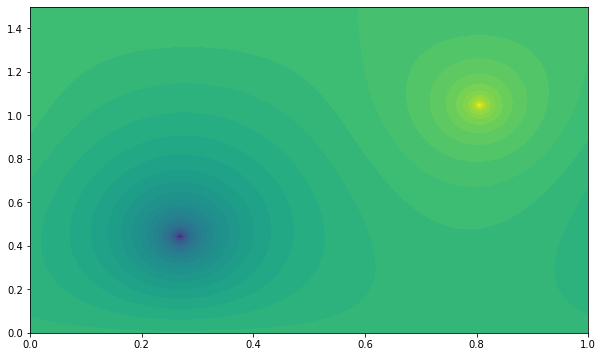

In [ ]:
### Solve it!
u = np.zeros((lmax, 1))
u = spsolve(AAcopy, rho)  

# Passing the results from a Column vector to a nxm Matrix
U = np.zeros((n, m))
for i in range(n):
  for j in range(m):
    index = calcLambda(i, j, n, m)
    U[i][j] += u[index]

# Generating the x and y coordinates
x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, m)

figure(2)
plt.figure(figsize=(10, 6))
plt.contourf(x,y,U, 50)
plt.show()

# **B-e-a-utiful, isn't it !**